### CODSOFT INTERNSHIP TASK-1

## Titanic Survival Prediction
### By: Subhasmith Pradhan

### Displaying Main Subject Image

In [3]:
from IPython.display import Image
Image(url="https://media.tenor.com/V34pCvOO6PAAAAAd/titanic.gif", height=600,width=900)

#### Import Libraries

In [4]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import warnings
warnings.filterwarnings("ignore")
import shap

#### Importing Dataset

In [5]:
dataset=pd.read_csv(r'C:\Users\WELCOME\Desktop\CodSoft Project\Titanic Survival, Task1\Titanic Suvival.csv')

In [6]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### Export the Data

##### printing first 20 rows

In [7]:
dataset.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


#### Numbers of row and Columns 

In [8]:
dataset.shape

(418, 12)

### Collecting some information about this dataset

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


#### Ckecking the null value/missing value in each column

In [10]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [11]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Handeling the Missing Values

##### drop the 'Cabin' column from the dataset

In [12]:
dataset=dataset.drop(columns='Cabin', axis=1)

##### replacing the missing values in "Age" column with mean value

In [13]:
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

#### Finding the mode value of "Embarked" column

In [14]:
print(dataset['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [15]:
print(dataset['Embarked'].mode()[0])

S


#### replacing the missing values in "Embarked" column with mode value

In [16]:
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

#### Check the number of missing value in each column

In [17]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [18]:
mean_value=dataset['Fare'].mean()
dataset['Fare'].fillna(mean_value, inplace=True)

## Data Analysis

Extracting Statistical information about the data

In [19]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Numbers of people Survived and Not Survived

In [20]:
dataset['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64>

Visualization of Data

In [21]:
sns.set(style="darkgrid")

##### Count plot for Survived column

In [22]:
dataset['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

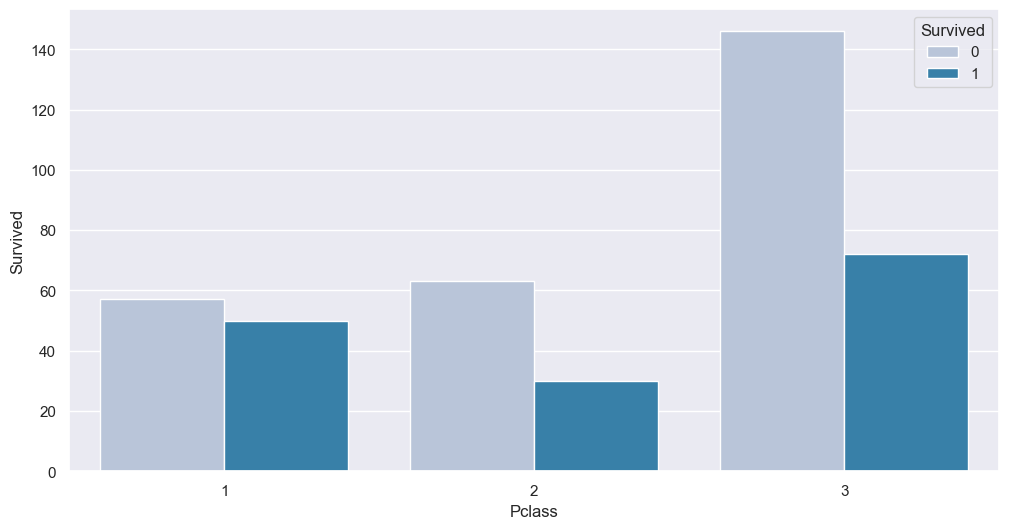

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data=dataset,x="Pclass", hue="Survived", palette='PuBu')
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

#### creating a count plot for Sex column

In [24]:
dataset['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

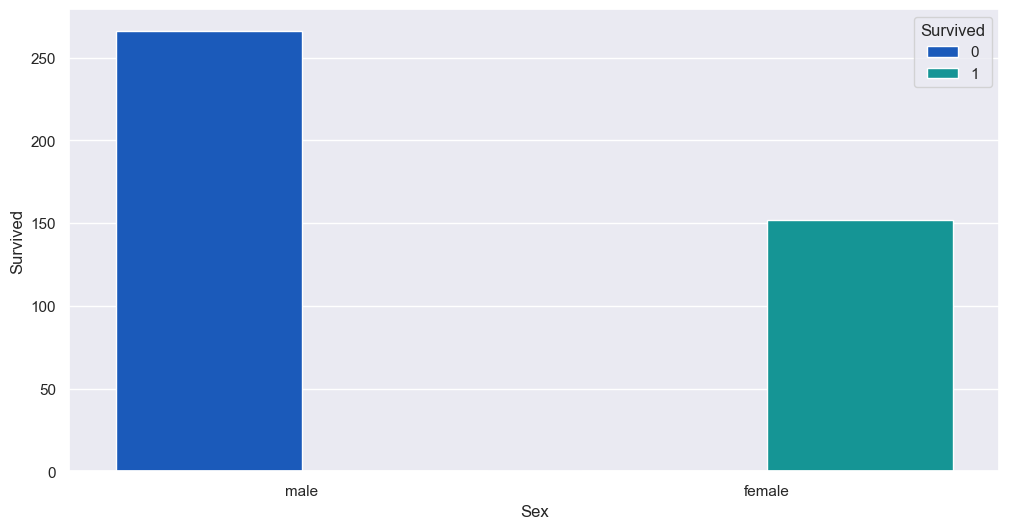

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(data=dataset,x="Sex", hue="Survived", palette='winter')
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.show()

<Axes: ylabel='Frequency'>

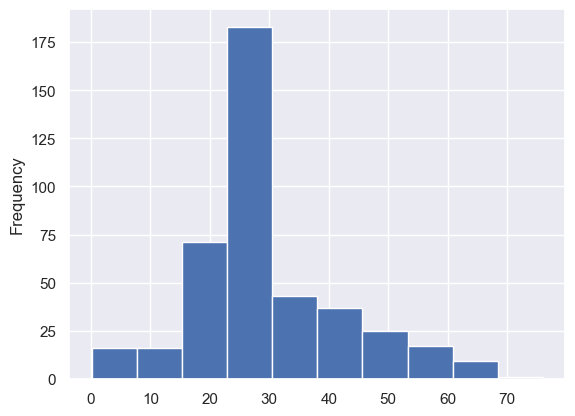

In [26]:
dataset['Age'].plot.hist()

<Axes: ylabel='Frequency'>

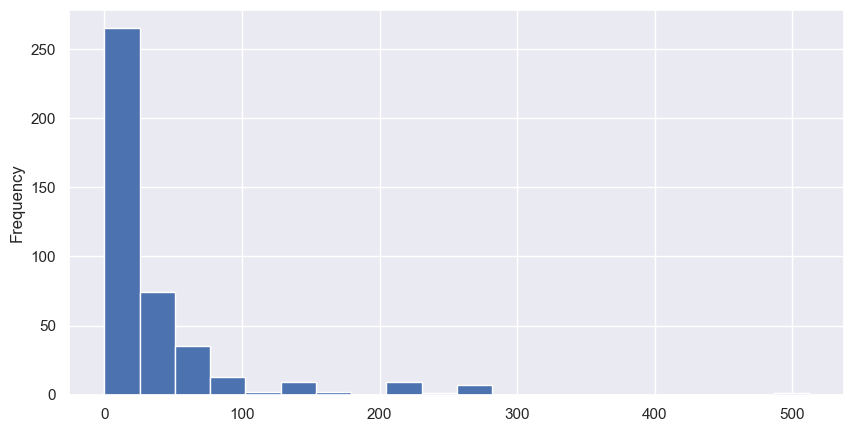

In [27]:
dataset['Fare'].plot.hist(bins=20, figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

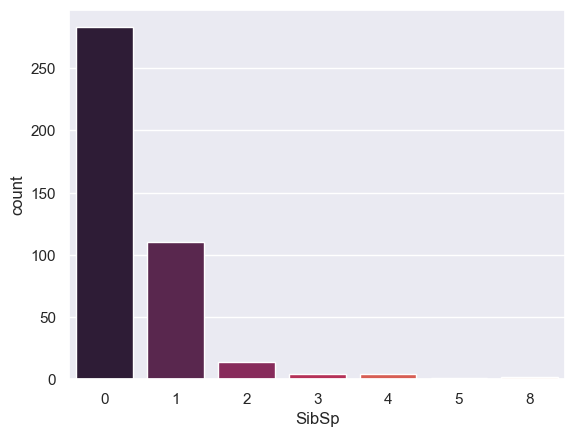

In [28]:
sns.countplot(x='SibSp', data=dataset, palette='rocket')

<Axes: ylabel='Frequency'>

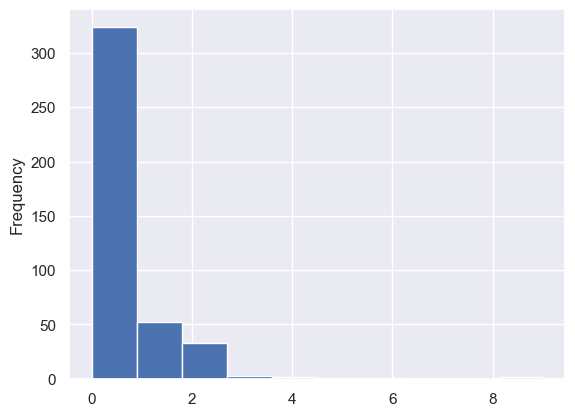

In [29]:
dataset['Parch'].plot.hist()

<Axes: xlabel='Parch', ylabel='count'>

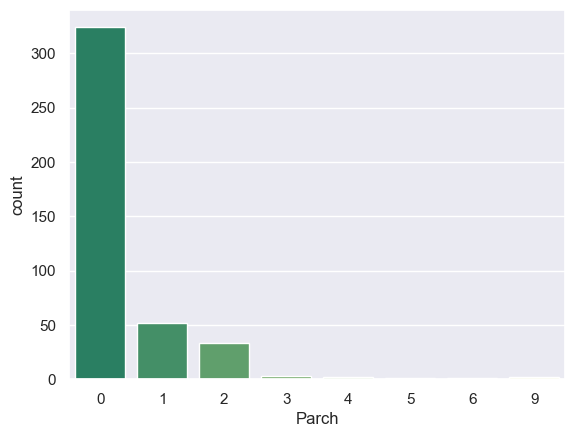

In [30]:
sns.countplot(x='Parch', data=dataset, palette='summer')

##### Survival Rate according to Sexual orientation

In [31]:
dataset.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [32]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
lanenco= LabelEncoder()
dataset['Sex']= lanenco.fit_transform(dataset['Sex'])
dataset['Name']= lanenco.fit_transform(dataset['Name'])
dataset['Embarked']= lanenco.fit_transform(dataset['Embarked'])
dataset['Ticket']= lanenco.fit_transform(dataset['Ticket'])

#### DATA WRANGLING

<Axes: >

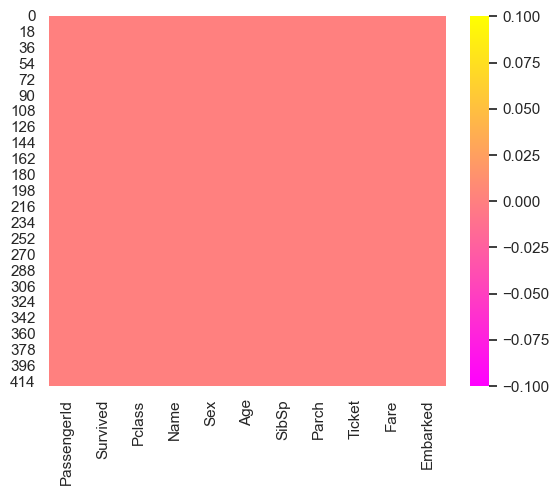

In [34]:
sns.heatmap(dataset.isnull(), cmap='spring')

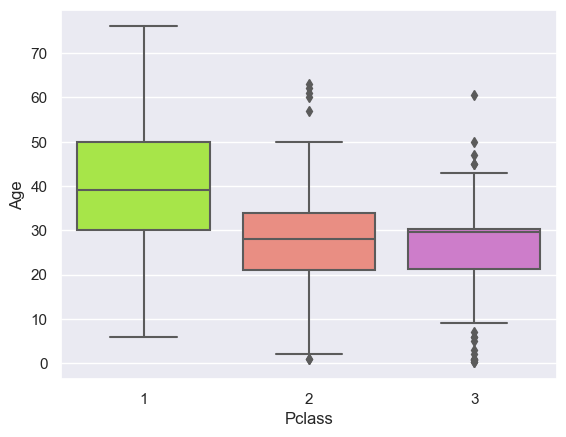

In [35]:
custom_palette=["greenyellow","salmon","orchid"]
sns.boxplot(x='Pclass', y='Age', data=dataset, palette=custom_palette)
plt.show()

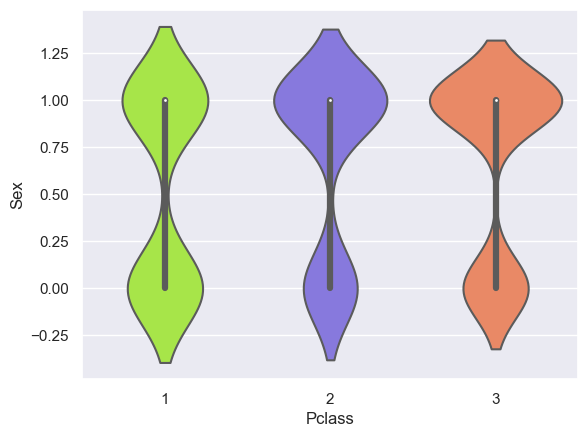

In [36]:
custom_palette=["greenyellow","mediumslateblue","coral"]
sns.violinplot(x='Pclass', y='Sex', data=dataset, palette=custom_palette)
plt.show()

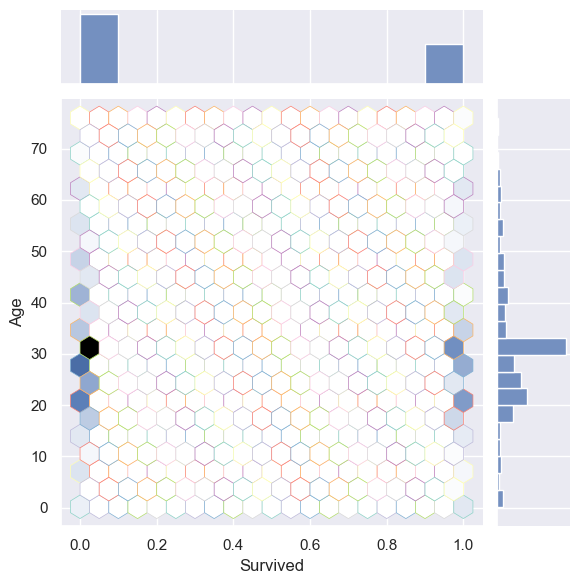

In [37]:
custom_palette=sns.color_palette("Set3", n_colors=10)
sns.jointplot(x='Survived', y='Age', data=dataset, kind='hex', joint_kws={'gridsize':20, 'edgecolors':'face', 'linewidths':0.5, 'color':custom_palette})
plt.show()

In [38]:
from matplotlib.colors import ListedColormap

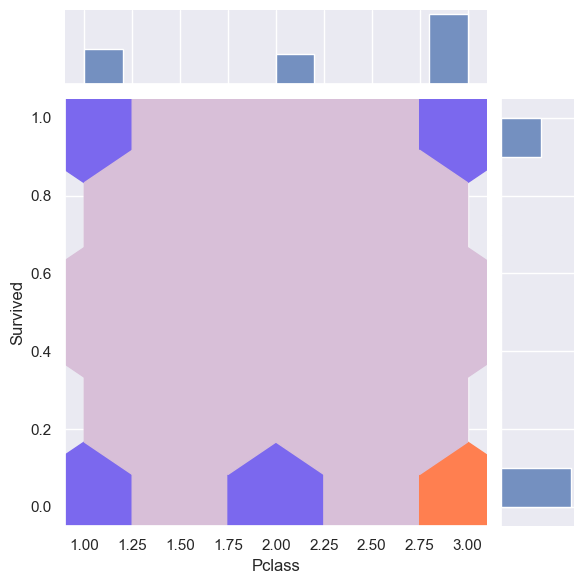

In [39]:
custom_cmap=ListedColormap(["thistle","mediumslateblue","coral"])
sns.jointplot(x='Pclass', y='Survived', data=dataset, kind='hex', cmap=custom_cmap)
plt.show()

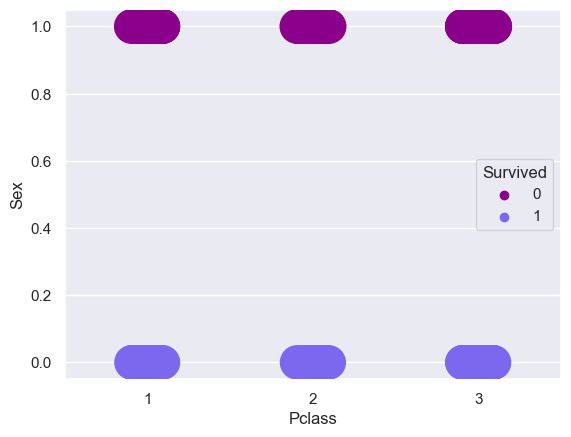

In [40]:
custom_palette=["darkmagenta","mediumslateblue"]
sns.stripplot(x='Pclass', y='Sex', hue="Survived", data=dataset, size=25 , marker='o', jitter=True, palette=custom_palette)
plt.show()

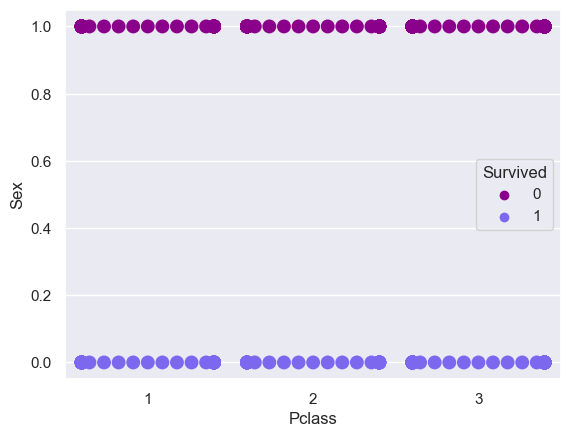

In [41]:
custom_palette=["darkmagenta","mediumslateblue"]
sns.swarmplot(x='Pclass', y='Sex', hue="Survived", data=dataset , size=10, marker='o', palette=custom_palette)
plt.show()

#### Spliting the data

In [42]:
x=dataset.drop('Survived', axis=1)
y=dataset['Survived']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=10)
display(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

(292, 10)

(292,)

(126, 10)

(126,)

#### Applying Models
## Logistic Regression

In [44]:
Lm=LogisticRegression()

In [45]:
Lm.fit(x_train, y_train)

LogisticRegression()

In [46]:
x_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
70,962,3,267,0,24.00000,0,0,250,7.7500,1
131,1023,1,161,1,53.00000,0,0,17,28.5000,0
17,909,3,21,1,21.00000,0,0,119,7.2250,0
287,1179,1,351,1,24.00000,1,0,52,82.2667,2
295,1187,3,12,1,26.00000,0,0,193,7.8958,2
...,...,...,...,...,...,...,...,...,...,...
369,1261,2,291,1,29.00000,0,0,339,13.8583,0
320,1212,3,10,1,26.00000,0,0,180,7.7750,2
15,907,2,415,0,24.00000,1,0,343,27.7208,0
125,1017,3,94,0,17.00000,0,1,245,16.1000,2


In [47]:
y_train

70     1
131    0
17     0
287    0
295    0
      ..
369    0
320    0
15     1
125    1
265    0
Name: Survived, Length: 292, dtype: int64

#### Make a Prediction on the test set

In [48]:
y_pred = Lm.predict(x_test)

In [49]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 362 to 278
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  126 non-null    int64  
 1   Pclass       126 non-null    int64  
 2   Name         126 non-null    int32  
 3   Sex          126 non-null    int32  
 4   Age          126 non-null    float64
 5   SibSp        126 non-null    int64  
 6   Parch        126 non-null    int64  
 7   Ticket       126 non-null    int32  
 8   Fare         126 non-null    float64
 9   Embarked     126 non-null    int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 8.9 KB


In [50]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix :', conf_mat)

Confusion Matrix : [[77  0]
 [ 0 49]]


In [51]:
accuracy= accuracy_score(y_test, y_pred)

In [52]:
report= classification_report(y_test, y_pred)

In [53]:
print("Accuracy :{:.2f}%".format(accuracy*100))
print("Classification Report:\n", report)

Accuracy :100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        49

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



<Axes: xlabel='Predicted', ylabel='Actual'>

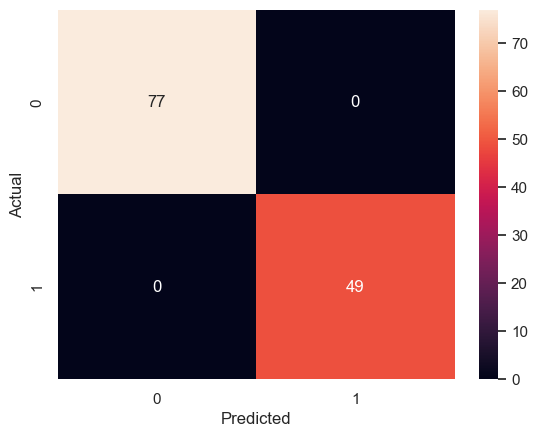

In [54]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'],
        colnames=['Predicted'])
sns.heatmap(conf_mat, annot=True)

###                                Thank You 